In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('C:/Users/Skywind/Desktop/Python/edX - Course 1/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df3 = pd.read_csv('Project_1_Clean.csv', index_col = 0)

# Exploratory Data Analysis

### How does Critic_Score compare with User_Score?

***To make the comparison, we need to multiply User_Score by 10 so that they are of the same scale***

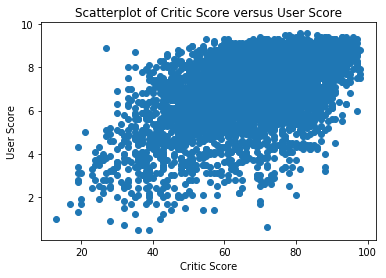

In [4]:
plt.scatter(df3['Critic_Score'], df3['User_Score'])
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Scatterplot of Critic Score versus User Score')
plt.show()

***We see that there is a positive correlation between these two variables***

In [5]:
np.corrcoef(df3['Critic_Score'], df3['User_Score'])

array([[ 1.        ,  0.58031837],
       [ 0.58031837,  1.        ]])

***From this we see that the correlation value is 0.58 which is moderately strong.***

***This means that when critics rate game low, users tend to rate games low too. And when critics rate games high, users tend to also rate games high.***

***Next, we can check their distribution with a histogram. We multiply the value of User_Score by 10 so that they are of the same scale.***

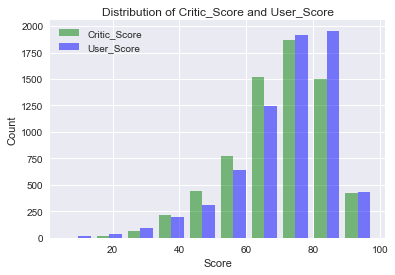

In [6]:
sns.set()

plt.hist([df3['Critic_Score'], df3['User_Score']*10], color = ['g', 'b'], alpha = 0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Critic_Score and User_Score')
plt.legend(('Critic_Score', 'User_Score'))
plt.show()

***From this we see that the distribution of scores are fairly similar between the Critic group and the User group. We see a left skewed distribution for both groups. This shows that both users and critics give higher ratings more often than lower ratings.***

### How does each platform contribute to Global Sales?

In [7]:
platforms = df3.groupby('Platform')['Global_Sales'].sum().reset_index()
platforms['Count'] = df3['Platform'].value_counts().sort_index().values
platforms = platforms.sort_values('Global_Sales', ascending = False)
platforms['Average_Sales_Per_Title'] = platforms['Global_Sales']/platforms['Count']
platforms

,Platform,Global_Sales,Count,Average_Sales_Per_Title
7,PS2,945.97,1140,0.829798
13,X360,853.30,858,0.994522
8,PS3,784.30,769,1.019896
12,Wii,658.98,479,1.375741
1,DS,382.33,464,0.823987
9,PS4,243.03,239,1.016862
14,XB,212.07,565,0.375345
6,PS,206.55,150,1.377000
10,PSP,187.92,390,0.481846
5,PC,187.12,651,0.287435


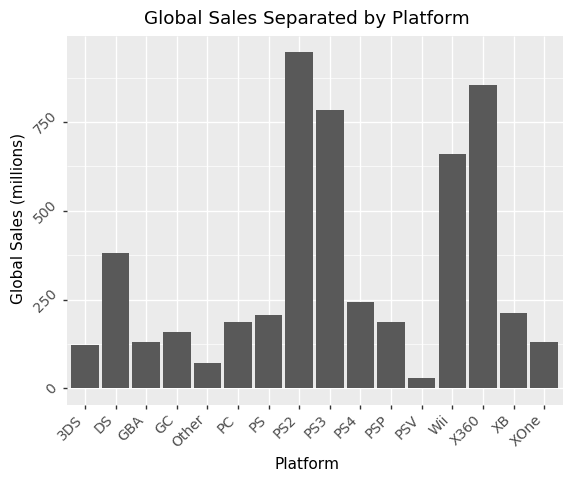

<ggplot: (28801200)>

In [8]:
ggplot(platforms, aes(x = 'Platform', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Platform')

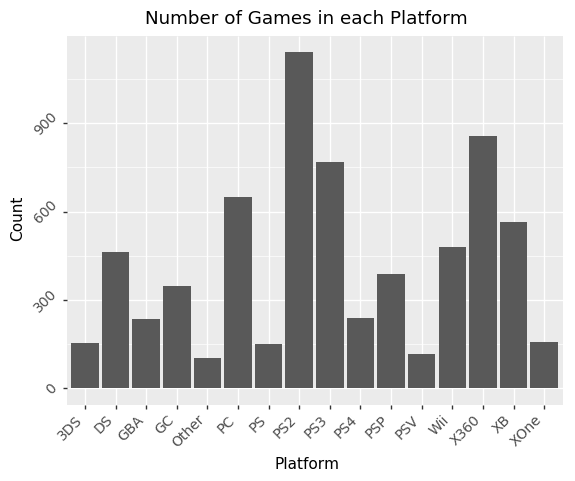

<ggplot: (-9223372036825821373)>

In [9]:
ggplot(platforms, aes(x = 'Platform', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Count') + \
ggtitle('Number of Games in each Platform')

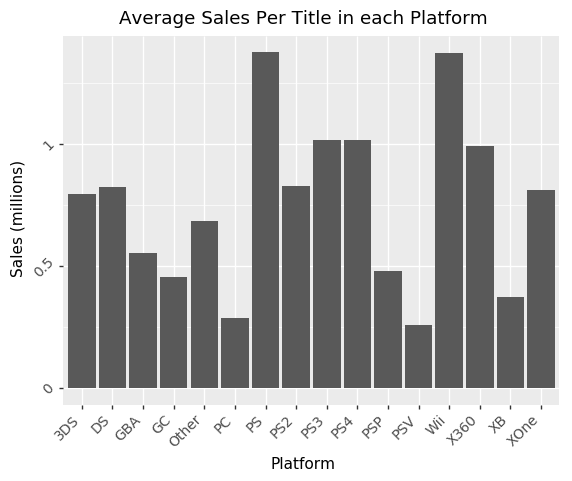

<ggplot: (29274593)>

In [10]:
ggplot(platforms, aes(x = 'Platform', y = 'Average_Sales_Per_Title')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Sales (millions)') + \
ggtitle('Average Sales Per Title in each Platform')

***We see the lowest contributor to Global Sales is the PSV (PS Vita) and the highest platform contributor is the PS2 (Playstation 2). So despite that the Wii Sports game is the highest individual game contributor to Global Sales, PS2 games made more money than the Wii overall. This is most likely attributed to the fact that the PS2 has more titles included in the sum. The average Wii title has made more on average compared to the PS2. Part of this reason may be due to the Wii Sports game and that Wii does not have many other games in the data.*** 

***It is also interesting to see that the PS3 and PS4 hasn't surpassed the PS2 in sales yet, which may be due to that not enough years has passed since the release of those consoles. We see something similar happen with the Xbox 360 to the Xbox One. The Xbox 360 came out in 2005 while the Xbox One came out in 2013. The PS2 came out in 2000 and the PS3 came out in 2006. We see a six year difference for PS2 and PS3 and a 8 year difference for Xbox 360 and Xbox One. We also note that the average PS2 title has been less successful in terms of sales when compared to the average PS3 or PS4 title. Since this is the case, when there is a larger sample of PS3 and PS4 games in the data, we would see to it that PS3 and PS4 will eventually surpass the PS2 in global sales. Since PS4's count is still not as high as PS3's count, new titles added to the PS4 group will influence the average title's worth a lot more. A really successful title or several unsuccessful titles can easily influence it. Since the PS3 titles have over 3 times as many games and the average sales is about the same, we'd most likely see greater growth in the global sales for PS3 games. On the other hand, the average Xbox 360 title has been more successful in terms of sales when compared to the average Xbox One title. Assuming that the sample in my data is representative of the population, the Xbox One has not been as successful in terms of sales compared to its predecessor in both total sales and average sales per title. With this trend, the Xbox One would need to have a much higher count compared to the Xbox 360 in order to surpass it in global sales.***

***With this current dataset we can't really investigate why there is a large gap in Global Sales between these platforms other than the lack of counts in some platforms, but we can speculate.***

***One possible reason for lower Global Sales in the successor systems is technology advancement. This would also apply to average sales per title in each platform. What I mean by that is that it is possible to play games without buying them. Also known as pirating. There are ways around systems to jailbreak them and be able to download the game online and burn them to a disc and then run them on the system. This would lower the sales for games and overall lower global sales. We notice that Xbox 360 and PS3 came out roughly around the same time. Xbox 360 came out about a year later. These sales are greater in PS3 than Xbox 360. They also see similar decreases in Global Sales in their successor systems. Although this is more than likely attributed to a low count especially as seen in the PS3-PS4 because they have similar average sales per title. Xbox One however, may just be not as successful. Pirating may also be a reason why the PC average sales and global sales are both fairly low. It is much easier to pirate on the PC than other platforms because you don't need to do any extra steps other than download a file. That may be why we see PC being 4th highest count in the data but have fairly low global sales. This is attributed to a low average sales per game.***

***Another reason is that there is missing data on some of the newer titles, hence not giving these other platforms enough observations to include more sales as seen with the PS3-PS4 case discussed earlier. In the cleaning stage, roughly 10000 observations were removed. So it could be that these are all observations that belong in the newer generation systems which we can verify.***

In [11]:
platforms_full = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platforms_full['Count'] = df['Platform'].value_counts().sort_index().values
platforms_full = platforms_full.sort_values('Global_Sales', ascending = False)
platforms_full['Average_Sales_Per_Title'] = platforms_full['Global_Sales']/platforms_full['Count']
platforms_full


,Platform,Global_Sales,Count,Average_Sales_Per_Title
16,PS2,1255.64,2161,0.581046
28,X360,971.63,1262,0.769913
17,PS3,939.43,1331,0.705808
26,Wii,908.13,1320,0.687977
4,DS,807.10,2152,0.375046
15,PS,730.68,1197,0.610426
6,GBA,318.50,822,0.387470
18,PS4,314.23,393,0.799567
19,PSP,294.30,1209,0.243424
13,PC,260.30,974,0.267248


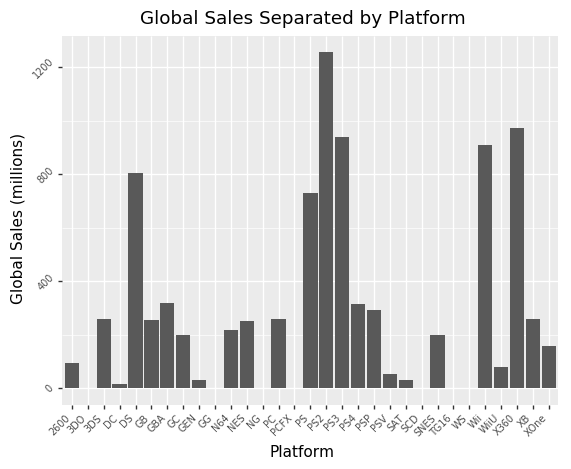

<ggplot: (28802396)>

In [12]:
ggplot(platforms_full, aes(x = 'Platform', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 7, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Platform')

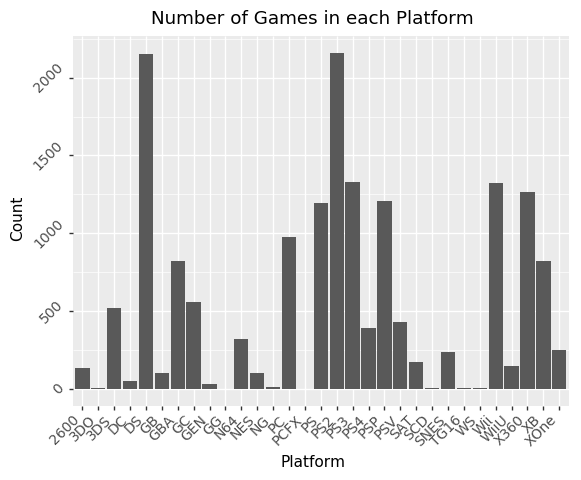

<ggplot: (29516271)>

In [13]:
ggplot(platforms_full, aes(x = 'Platform', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Count') + \
ggtitle('Number of Games in each Platform')

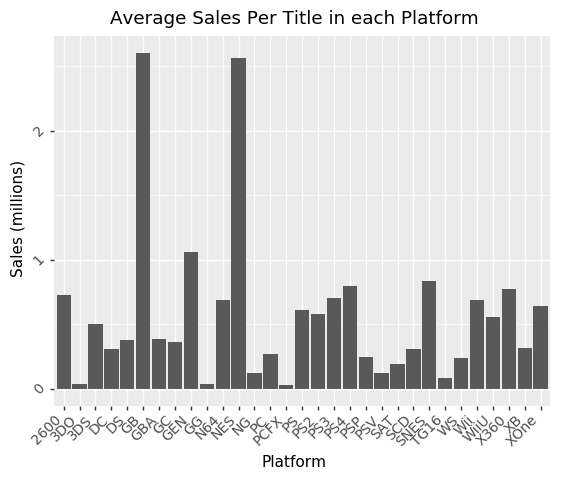

<ggplot: (-9223372036824876870)>

In [14]:
ggplot(platforms_full, aes(x = 'Platform', y = 'Average_Sales_Per_Title')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Sales (millions)') + \
ggtitle('Average Sales Per Title in each Platform')

***From this we see that the relative distribution of the PS2, Xbox 360, and the newer gen systems are the same for global sales. We see increases in Global Sales for systems such as the PS1 and DS which are all much older. It makes sense because users and critics are less likely to have played and rated much older games. So despite that the data of global sales were available, users and critics have not rated those games. If that is the case, those null values would be removed, which is our current dataframe. But it is also important to note that Metacritic data does not contain certain platforms, such as the original Nintendo. So this line of reasoning does not apply to those platforms.***

***In the average sales plot, see that with a higher count for PS4 games, the PS4 on average has been more successful in terms of sales per title compared to PS3 and the previous generations. Since we would unlikely continue to see an increase in older generation sales, the PS4 would eventually overtake the previous generations for global sales since it has the highest average per game. This can change if the newer counts of PS4 games aren't as successful, so it may be too early to tell, especially because it is not much higher than the previous generations. For Xbox 360 comparing to Xbox One, we still see the same trend. Xbox 360 is more successful compared to the Xbox One in both global sales and average sales per title.***

***The PC average game value actually decreased in the full data set which is not too surprising. Especially because I think smaller, not as popular games are more likely to be pirated due to not wanting to spend money on a game someone may not like. It also may be more convenient. A large number of these games are single player games. There are a limited amount of multiplayer games which require players to buy the game. These games may have already been included in the cleaned data set so that including more PC games lowered the average game value due to a greater ratio of single player games compared to popular multiplayer games.***

***In the very old generation platforms, we see two interesting points. We note that the gameboy and the original nintendo have extremely high average sales per game values. These are the one of the few earliest systems and are regarded as classics. There was also little technology available at the time so pirating games was virtually impossible. We see the effect here on the older games have much higher sales per title than newer systems. The Super nintendo may have also been fairly successful as well, but our data just may not include it due to the nature of the website the data is collected on.***

***One other point sticks out from the full data set which is the number of DS games. It has fairly high global sales, but low average game sales. Each game individually didn't perform well in sales most likely due to pirating and jailbreaking, but it made it up with the number of DS games.***

***For the platforms with low count that were pooled into the 'Other' category in the cleaned data, the included platforms may have been the more popular titles on that particular platform. This may lead to a high average sales value for the 'Other' category. A closer inspection on what games were included could be insightful. The two platforms that are under 'Other' are the DC and Wii U.***

In [55]:
df[df['Platform'] == 'WiiU']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
185,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,5.22,84.0,70.0,8.1,733.0,Nintendo,E
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014.0,Fighting,Nintendo,2.60,1.08,0.81,0.38,4.87,NaN,NaN,NaN,NaN,NaN,NaN
247,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.54,1.18,1.46,0.26,4.43,81.0,88.0,8.5,1184.0,Nintendo,E10+
248,Nintendo Land,WiiU,2012.0,Misc,Nintendo,2.52,1.11,0.46,0.33,4.42,77.0,61.0,7.9,471.0,Nintendo,E10+
260,Super Mario 3D World,WiiU,2013.0,Platform,Nintendo,2.11,1.16,0.73,0.32,4.32,93.0,83.0,9,1607.0,Nintendo,E
424,Super Mario Maker,WiiU,2015.0,Platform,Nintendo,1.18,0.89,0.94,0.20,3.21,88.0,85.0,8.7,691.0,Nintendo,E
720,New Super Luigi U,WiiU,2013.0,Platform,Nintendo,1.25,0.62,0.18,0.18,2.24,77.0,59.0,7.9,288.0,Nintendo,E
978,The Legend of Zelda: The Wind Waker,WiiU,2013.0,Action,Nintendo,0.92,0.60,0.14,0.14,1.79,NaN,NaN,NaN,NaN,NaN,NaN
1015,Wii Party U,WiiU,2013.0,Misc,Nintendo,0.30,0.56,0.84,0.05,1.75,65.0,38.0,6.8,135.0,Nd Cube,E


In [56]:
df[df['Platform'] == 'DC']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
643,Sonic Adventure,DC,1998.0,Platform,Sega,1.26,0.61,0.46,0.08,2.42,NaN,NaN,NaN,NaN,NaN,NaN
966,Crazy Taxi,DC,2000.0,Racing,Sega,1.10,0.51,0.12,0.08,1.81,NaN,NaN,NaN,NaN,NaN,NaN
1679,NFL 2K,DC,1999.0,Sports,Sega,1.12,0.05,0.00,0.02,1.20,NaN,NaN,NaN,NaN,NaN,NaN
1712,Shenmue,DC,1999.0,Adventure,Sega,0.52,0.24,0.38,0.04,1.18,88.0,9.0,9.4,201.0,Sega AM2,T
1787,Resident Evil - Code: Veronica,DC,2000.0,Action,Eidos Interactive,0.41,0.23,0.47,0.03,1.14,NaN,NaN,NaN,NaN,NaN,NaN
1877,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.00,0.02,1.09,97.0,22.0,6,47.0,Visual Concepts,E
3815,Seaman,DC,1999.0,Simulation,Sega,0.00,0.00,0.52,0.00,0.52,82.0,24.0,8.4,16.0,Vivarium,T
4665,Sega Rally Championship 2,DC,1999.0,Racing,Sega,0.00,0.00,0.41,0.00,0.41,NaN,NaN,NaN,NaN,NaN,NaN
5145,Virtua Fighter 3tb,DC,1998.0,Fighting,Sega,0.00,0.00,0.37,0.00,0.37,NaN,NaN,NaN,NaN,NaN,NaN
5240,J-League Pro Soccer Club o Tsukurou!,DC,1999.0,Sports,Sega,0.00,0.00,0.36,0.00,0.36,NaN,NaN,NaN,NaN,NaN,NaN


***From the Wii U games where we have non-null values for critic-score, we see that there are several titles >4 million in global sales. These games are contributing to an higher average global sales value for the 'Other' category. The top two contributing games are Mario Kart 8 and New Super Mario Bros U. The other high contributors are also Mario games. So it is the case that more popular titles of the Wii U games were included in the data. When the sample size of Wii U games increases, we are likely to see the average global sales value for the 'Other' category to go down. This could be what's going on in other platforms as seen in the case with Wii Sports.*** 

***Under the DC games, we see that there isn't any non-null values that are pulling up the average global sales value for the 'Other' category. The opposite could be true for the DC since the count is low. It could be that the average global sales would increase if it had more games included because it would eventually include a game whose global sales value is high.***

### How does each genre contribute to Global Sales?

In [16]:
genres = df3.groupby('Genre')['Global_Sales'].sum().reset_index()
genres['Count'] = df3['Genre'].value_counts().sort_index().values
genres = genres.sort_values('Global_Sales', ascending = False)
genres['Average_Sales_Genre'] = genres['Global_Sales']/genres['Count']
genres

,Genre,Global_Sales,Count,Average_Sales_Genre
0,Action,1203.16,1630,0.738135
10,Sports,833.85,943,0.884252
8,Shooter,816.48,864,0.945000
7,Role-Playing,501.37,712,0.704171
6,Racing,476.22,581,0.819656
3,Misc,416.26,384,1.084010
4,Platform,377.80,403,0.937469
2,Fighting,249.95,378,0.661243
9,Simulation,202.70,297,0.682492
1,Adventure,80.75,248,0.325605


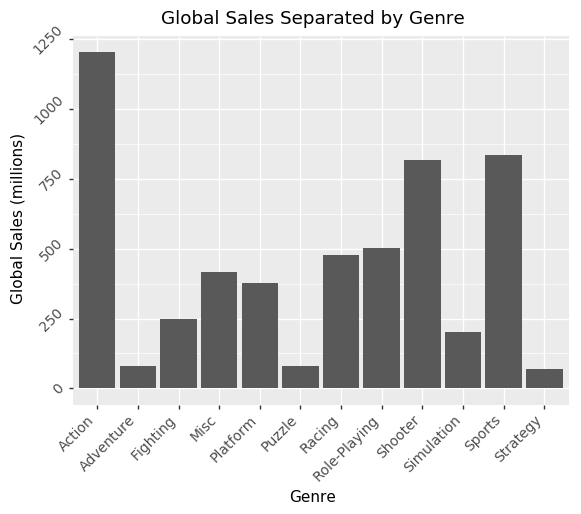

<ggplot: (-9223372036825501310)>

In [17]:
ggplot(genres, aes(x = 'Genre', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Genre')

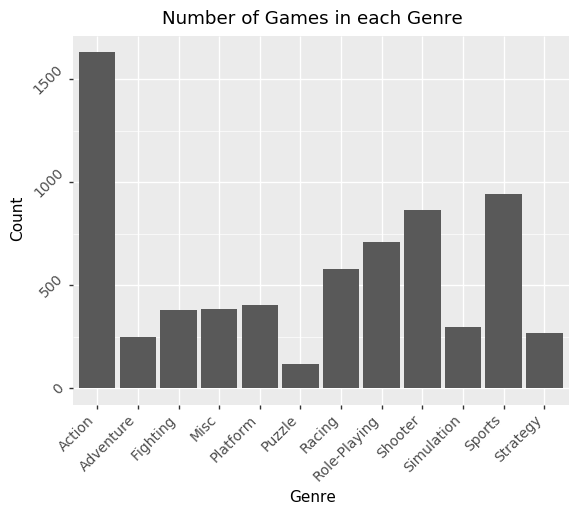

<ggplot: (29251143)>

In [18]:
ggplot(genres, aes(x = 'Genre', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Count') + \
ggtitle('Number of Games in each Genre')

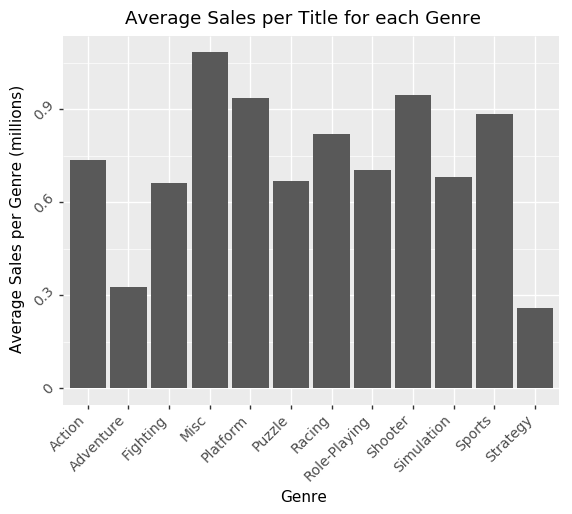

<ggplot: (28142221)>

In [19]:
ggplot(genres, aes(x = 'Genre', y = 'Average_Sales_Genre')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Average Sales per Genre (millions)') + \
ggtitle('Average Sales per Title for each Genre')

***From this we see that the Action genre is the highest contributor to Global Sales. But this doesn't neccesarily mean that Action by itself is the most popular. Games aren't neccesarily only one genre. It could be that Action paired with another genre contributes the most sales, but in this data set only one genre is listed for each game. For an example, Action may be frequently paired with Shooter. It is hard to imagine a shooter game that is not "action"-based.***

***It looks like the Action genre may just be an average of all the other categories assuming that most games are "action"-based. We can check this by averaging all the other genres.***

In [20]:
genres.iloc[1:, :]['Average_Sales_Genre'].sum()/(len(genres)-1)

0.72484130775114852

***From this we see that is pretty much the case. The value for average sales for Action games is 0.738135 while our computed average sales for every genre except Action combined is 0.7248. This shows that it is very likely that the Action genre is including at least one of another genre.***

***It is the same for other genres. To analyze the data better we would need to have better data, such as all of the genres associated for each game rather than a single one.***

***We see that the Misc genre on average has more successful games in terms of sales. The Misc genre is somewhat vague. We can examine what kind of games are under the Misc genre and its highest contributor by examining the data.***

In [21]:
df3[df3['Genre'] == 'Misc'].head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,1,11.0
8,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Other,E,0,7.0
12,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,58.0,7.9,50.0,Nintendo,E,1,12.0
39,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E10+,1,6.0
45,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.80,2.85,0.01,0.78,9.44,74.0,24.0,7.3,24.0,Ubisoft,E10+,1,7.0
49,Mario Party DS,DS,2007.0,Misc,Nintendo,4.40,1.85,1.98,0.68,8.91,72.0,27.0,7.8,85.0,Other,E,0,10.0
53,Wii Party,Wii,2010.0,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38,68.0,42.0,7.4,54.0,Other,E,0,7.0
54,Mario Party 8,Wii,2007.0,Misc,Nintendo,3.74,2.24,1.58,0.70,8.27,62.0,41.0,6.3,190.0,Other,E,0,10.0
67,Just Dance,Wii,2009.0,Misc,Ubisoft,3.48,2.99,0.00,0.73,7.20,49.0,21.0,8.0,110.0,Other,E10+,0,8.0
77,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.05,2.16,0.00,0.55,6.76,74.0,10.0,7.3,28.0,Ubisoft,E10+,1,5.0


***We see that most of these titles are music games, 'Party' games which comprise of mini games, and brain academy. One of the reasons why this genre in particular has a high average sales value is because there aren't as many of these types of games around so more people want to buy them. Mario party is the first of its type of game and there hasn't been many other similar games which may cause the sales of these games to increase. Music or rhythm based games aren't as saturated as other times of games either.***

***We also notice that the majority of these titles come from the Wii, which we saw earlier have very high average game sales attributed to mostly a few titles with high global sales. This also comes to the fact that the Wii caters to a wider audience in general compared to other systems, so it ends in more sales.***

***We can look at the full data set to see if anything changes with more data.***


In [22]:
genres_complete = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genres_complete['Count'] = df['Genre'].value_counts().sort_index().values
genres_complete = genres_complete.sort_values('Global_Sales', ascending = False)
genres_complete['Average_Sales_Genre'] = genres_complete['Global_Sales']/genres_complete['Count']
genres_complete



,Genre,Global_Sales,Count,Average_Sales_Genre
0,Action,1745.27,3370,0.517884
10,Sports,1332.00,2348,0.567291
8,Shooter,1052.94,1323,0.795873
7,Role-Playing,934.40,1500,0.622933
4,Platform,828.08,888,0.932523
3,Misc,803.18,1750,0.458960
6,Racing,728.90,1249,0.583587
2,Fighting,447.48,849,0.527067
9,Simulation,390.42,874,0.446705
5,Puzzle,243.02,580,0.419000


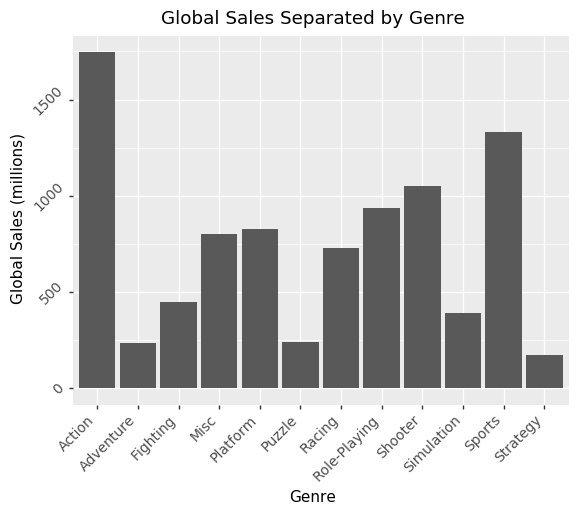

<ggplot: (-9223372036826709735)>

In [23]:
ggplot(genres_complete, aes(x = 'Genre', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Genre')

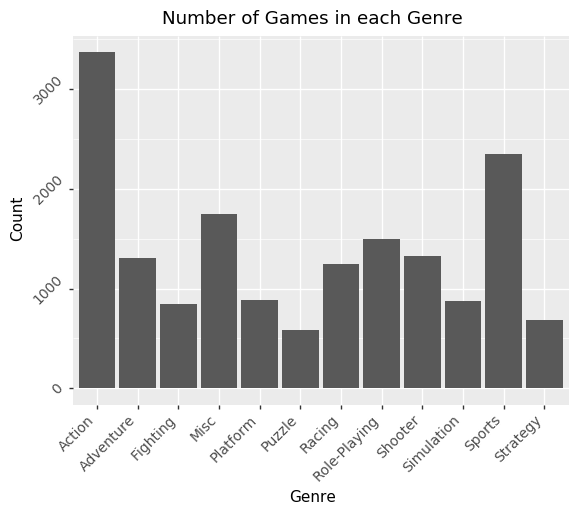

<ggplot: (30120298)>

In [24]:
ggplot(genres_complete, aes(x = 'Genre', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Count') + \
ggtitle('Number of Games in each Genre')

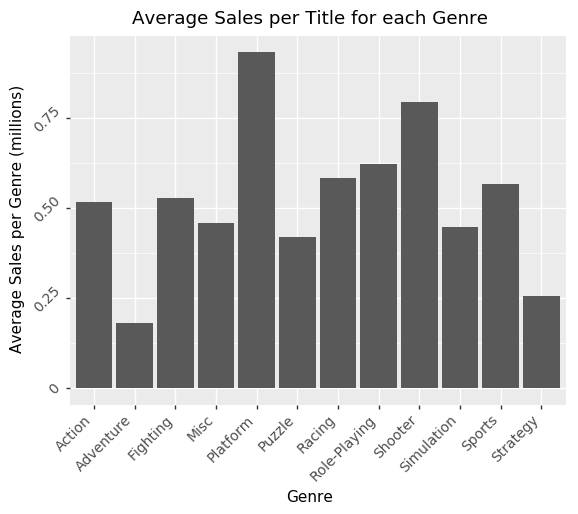

<ggplot: (30110170)>

In [25]:
ggplot(genres_complete, aes(x = 'Genre', y = 'Average_Sales_Genre')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Average Sales per Genre (millions)') + \
ggtitle('Average Sales per Title for each Genre')

***The global sales looks relatively the same with an increase in Sports and Role-Playing games. Since many null values were in the Critics_Count and User_Count category, it could be that these Genres are not popular on the website in the population of users and critics that use that website.***

***The distribution of average sales remains mostly the same but there are two notable changes. The misc genre went down and the Platform genre went up for average sales. The number of misc games increased dramatically about 5-6 times more games were included in the full data. So my earlier discussion about the presence of party games being more popular and the misc genre itself unsaturated with games was incorrect. It still could be true that these games are the more popular games and just have a large number of unsuccessful games. We would need to look at a large sample of the unsuccessful games to know for sure which isn't the focus of this analysis.***

***We can examine further what titles exactly are pulling the Platform genre upward. It is more than likely that these will belong to the platforms that are not represented on Metacritic.***


In [26]:
df[df['Genre'] == "Platform"].head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN
45,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,NaN,NaN,NaN,NaN,NaN,NaN
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.0,Nintendo,E
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
56,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,NaN,NaN,NaN,NaN,NaN,NaN


***Here we see NES, SNES, and N64 as some of the platforms for the null values. Indeed, the Average Sales value for Platform went up because the inclusion of the platforms not on MetaCritic.***

***We also see that most of these games are the Mario games. Since my analysis is not focused on subsetting the data further, I will not examine this data further. It could be insightful to subset the Platforming data more so that it is separated into groups such as "Mario", "Donkey Kong", etc to understand if its the Platform genre itself having an effect or a specific franchise.***

### How does each rating contribute to Global_Sales?

In [27]:
ratings = df3.groupby('Rating')['Global_Sales'].sum().reset_index()
ratings['Count'] = df3['Rating'].value_counts().sort_index().values
ratings = ratings.sort_values('Global_Sales', ascending = False)
ratings['Average_Sales_Rating'] = ratings['Global_Sales']/ratings['Count']
ratings


,Rating,Global_Sales,Count,Average_Sales_Rating
0,E,1961.42,2083,0.941632
2,M,1427.73,1434,0.995628
3,T,1377.35,2378,0.579205
1,E10+,540.55,930,0.581237


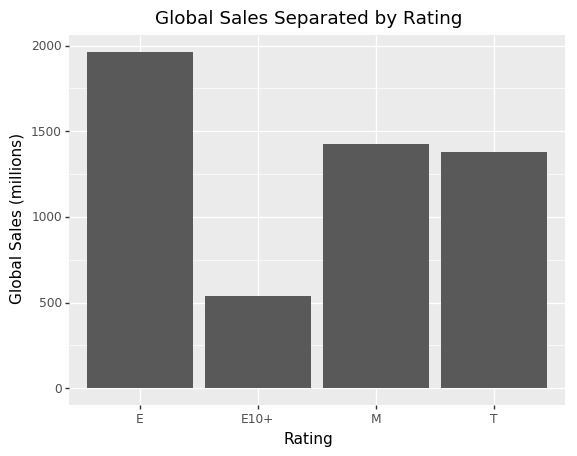

<ggplot: (-9223372036848984523)>

In [28]:
ggplot(ratings, aes(x = 'Rating', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Rating')

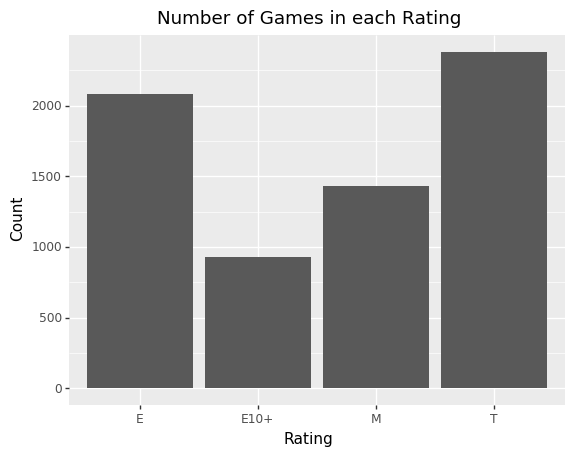

<ggplot: (-9223372036824625057)>

In [29]:
ggplot(ratings, aes(x = 'Rating', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Count') + \
ggtitle('Number of Games in each Rating')

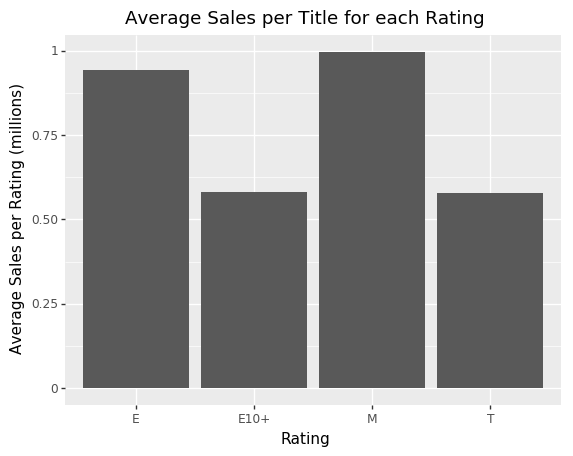

<ggplot: (-9223372036824103971)>

In [30]:
ggplot(ratings, aes(x = 'Rating', y = 'Average_Sales_Rating')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Average Sales per Rating (millions)') + \
ggtitle('Average Sales per Title for each Rating')

***From this we see that the E rating contributes the most to Global Sales. This is attributed to a fairly high number of E rated games and having a high average sales value. The most saturated Rating is the "T" for Teens rating, but since they have a low average sales value it resulted in a lower global sales compared to the E rating. Since games rated for everyone are accessible to everyone, it has a larger population buying this type of game which results in higher global sales. T and M rated games have about the same contribution to global sales despite having very different average sales values.***

***The highest average sales value belongs to the M rating. This could be due to that the high contributing Shooter games are rated M. Since we know that Shooter games have a fairly high average sales value it comes to no surprise that this would have an effect on the M games. These games involve more violence and gore which would make them inappropriate for some audiences. There are also less M rated games compared to E rated games. This is either due to a lack of data for M rated games or that there are just more E rated games in general which would require additional data or research.***

***We examine some of the top contributors of the M rating to what titles are pulling it upward.***

In [31]:
df3[df3['Rating'] == "M"].head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release
10,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Other,M,0,4.0
11,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Other,M,0,13.0
13,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Other,M,0,4.0
14,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Other,M,0,15.0
17,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,Other,M,0,6.0
18,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M,0,7.0
19,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M,0,5.0
20,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M,0,5.0
21,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,100.0,6.3,2698.0,Other,M,0,8.0
22,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,Other,M,0,6.0


***Here we see that my assumptions were correct. And taking note that the Action genre is sharing its value with Shooter games it makes sense to see Action here as well. Every single game on this list is more or less a shooting game.***

***The E rated games are most likely being pulled up by Misc, Platforming, and Sports games including Wii sports since those don't involve as much violence which we can check:***

In [32]:
df3[df3['Rating'] == "E"].head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,11.0
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,9.0
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,8.0
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,11.0
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,1,11.0
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,1,8.0
6,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,1,12.0
7,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,1,10.0
8,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Other,E,0,7.0
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,1,8.0


***We see that it does line up with the data we had in our platforms comparisons with global sales and average sales.***

***Next, we can check for any changes with the full data***

In [33]:
ratings_complete = df.groupby('Rating')['Global_Sales'].sum().reset_index()
ratings_complete['Count'] = df['Rating'].value_counts().sort_index().values
ratings_complete = ratings_complete.sort_values('Global_Sales', ascending = False)
ratings_complete['Average_Sales_Rating'] = ratings_complete['Global_Sales']/ratings_complete['Count']
ratings_complete

,Rating,Global_Sales,Count,Average_Sales_Rating
1,E,2436.90,3991,0.610599
7,T,1494.40,2961,0.504694
5,M,1473.84,1563,0.942956
2,E10+,655.81,1420,0.461838
4,K-A,4.33,3,1.443333
0,AO,1.95,1,1.950000
3,EC,1.78,8,0.222500
6,RP,0.08,3,0.026667


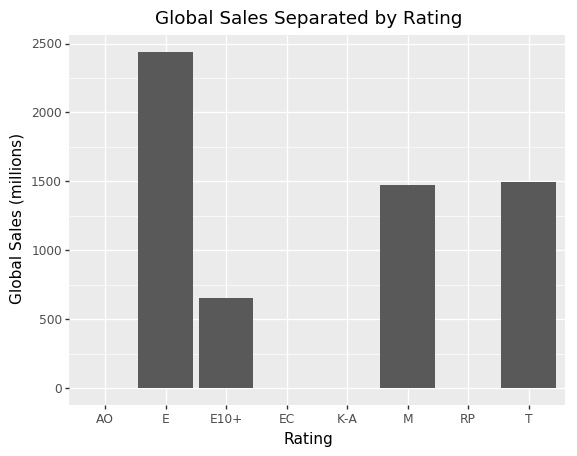

<ggplot: (-9223372036824104146)>

In [34]:
ggplot(ratings_complete, aes(x = 'Rating', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Rating')

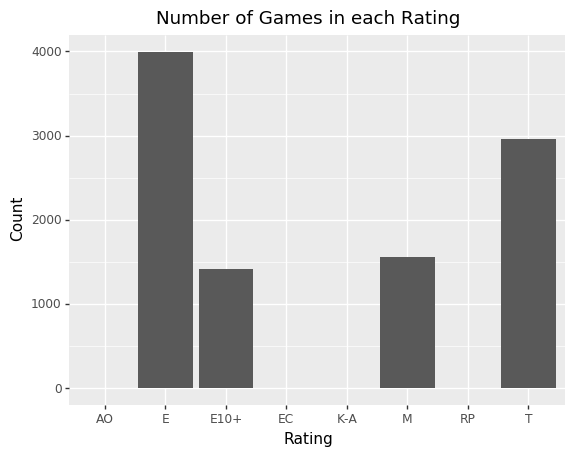

<ggplot: (-9223372036824716039)>

In [35]:
ggplot(ratings_complete, aes(x = 'Rating', y = 'Count')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Count') + \
ggtitle('Number of Games in each Rating')

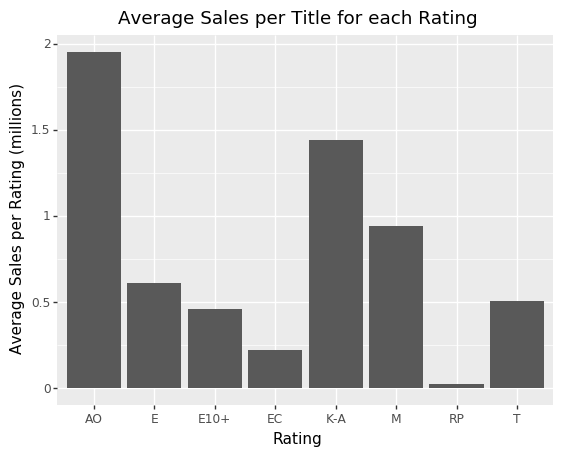

<ggplot: (30084556)>

In [36]:
ggplot(ratings_complete, aes(x = 'Rating', y = 'Average_Sales_Rating')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Average Sales per Rating (millions)') + \
ggtitle('Average Sales per Title for each Rating')

***We see the same distribution for global sales and average sales in the full data. Despite having 10000 less observations, we have the same shape. This could mean that this is the "true" distribution of global sales by rating, meaning that there is a sufficient sample size in each rating we have in our clean data. So our earlier possibility of either having less M rated games compared to E rated games or just not having enough data leans more on the side of just being less M rated games in general. This means that E rated games in general will have a higher overall global sales, but M rated games tend to have more popular games because of. Assuming that high individual contributors to global sales means that it's popular.***

***Since there is only 1 title in AO, EC, and RP, these values are inflated, especially AO. As we know this value is GTA San Andreas which we re-categorized as M. The EC category has null values so it was dropped and wasn't in the clean data.***

### Does Years since release correlate to higher global sales?

In [37]:
years = df3.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
years['Count'] = df3['Year_of_Release'].value_counts().sort_index().values
years['Year_Average'] = df3.groupby('Year_of_Release')['Global_Sales'].mean().reset_index()['Global_Sales']
years

,Year_of_Release,Global_Sales,Count,Year_Average
0,1985.0,0.03,1,0.030000
1,1988.0,0.03,1,0.030000
2,1992.0,0.03,1,0.030000
3,1994.0,1.27,1,1.270000
4,1996.0,20.10,7,2.871429
5,1997.0,35.01,13,2.693077
6,1998.0,43.18,25,1.727200
7,1999.0,51.17,30,1.705667
8,2000.0,81.24,102,0.796471
9,2001.0,253.88,256,0.991719


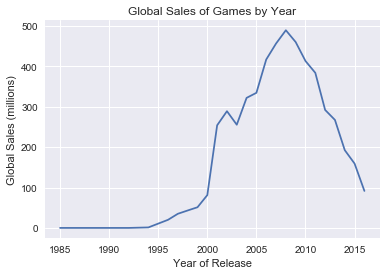

In [38]:
plt.plot(years['Year_of_Release'], years['Global_Sales'])
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales of Games by Year')
plt.show()

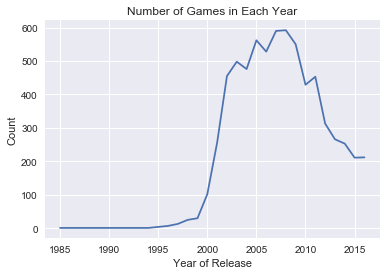

In [39]:
plt.plot(years['Year_of_Release'], years['Count'])
plt.ylabel('Count')
plt.xlabel('Year of Release')
plt.title('Number of Games in Each Year')
plt.show()

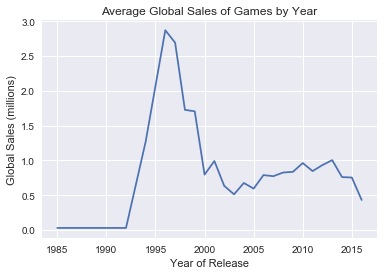

In [40]:
plt.plot(years['Year_of_Release'], years['Year_Average'])
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (millions)')
plt.title('Average Global Sales of Games by Year')
plt.show()

***Based on total global sales alone, we see that the games released around 2007 and 2008 has seen the highest overall sales. This is also about the time where the count of games were the highest. So this peak could just be attributed to a larger abundance of data for these years. We see the average global sales of games peak around 1996. It is likely that this happened by chance due to low sample size as we can see in the number of games in each year. It was less than 100 until year 2000.***

***There doesn't seem to be any linear relationship between years since release and global sales overall or the average. If we compare the data that have enough counts from year 2000 and onward, we see a non linear relationship in overall global sales and  average global sales of games seem to go down as the years progress. This means that our years_since_release variable would have a slight positive correlation. This could be attributed to the technology/pirating explanation from earlier because it is easier to pirate games and play them illegally nowadays.***

***It may be more insightful to look at the full data:***

In [41]:
years_complete = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
years_complete['Count'] = df['Year_of_Release'].value_counts().sort_index().values
years_complete['Year_Average'] = df.groupby('Year_of_Release')['Global_Sales'].mean().reset_index()['Global_Sales']
years_complete

,Year_of_Release,Global_Sales,Count,Year_Average
0,1980.0,11.38,9,1.264444
1,1981.0,35.77,46,0.777609
2,1982.0,28.86,36,0.801667
3,1983.0,16.79,17,0.987647
4,1984.0,50.36,14,3.597143
5,1985.0,53.94,14,3.852857
6,1986.0,37.07,21,1.765238
7,1987.0,21.74,16,1.358750
8,1988.0,47.22,15,3.148000
9,1989.0,73.45,17,4.320588


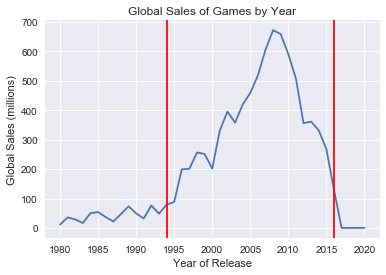

In [42]:
plt.plot(years_complete['Year_of_Release'], years_complete['Global_Sales'])
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales of Games by Year')
plt.axvline(x=1994, color = 'r')
plt.axvline(x=2016, color = 'r')
plt.show()

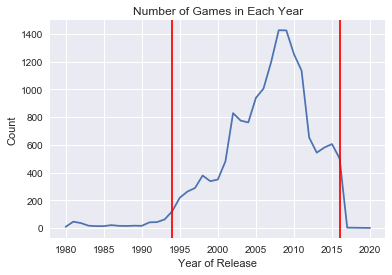

In [43]:
plt.plot(years_complete['Year_of_Release'], years_complete['Count'])
plt.ylabel('Count')
plt.xlabel('Year of Release')
plt.title('Number of Games in Each Year')
plt.axvline(x=1994, color = 'r')
plt.axvline(x=2016, color = 'r')
plt.show()

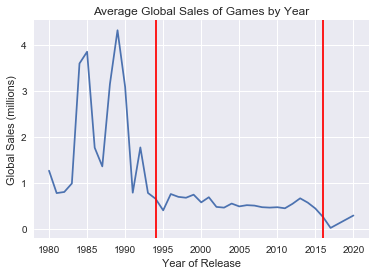

In [44]:
plt.plot(years_complete['Year_of_Release'], years_complete['Year_Average'])
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (millions)')
plt.title('Average Global Sales of Games by Year')
plt.axvline(x=1994, color = 'r')
plt.axvline(x=2016, color = 'r')
plt.show()

***The vertical red lines indicate the years of data that we have that have enough data points. Looking at the full range of data, we see very inconsistent values for the average global sales before 1994.These are definitely due to those NES and GB games. For global sales, we see a steady positive increase in global sales up until 2007-2008 which is the same in our clean data set. This may indicate that games released around 8-9 years ago see the higest peak in global sales. This is also when we had the highest count of data so that may not be accurate. But it could be that a year after this data was collected, more data on games released in 2009 were made available which make it have as high as count or higher than 2007 or 2008. Without more data. If we compare our past data, it has always been the case that global sales for games were greater than the previous year up until 2007 or 2008 in general.***

***In the average global sales plot, we see a similar decrease in global sales as we did in our clean data that I speculate is due to the technology/pirating effect.***

***In general, we can't be sure that the low count or average game sales observed above are caused by unpopularity or just a lack of titles in those genres/platforms etc on the website in which the data was collected from except in the case of the Ratings because we found that the distributions of the full data set versus the clean dataset were relatively the same.***

***There are also a few outliers that are mistakes in the data. We have 3 2017 games and 1 2020 game in 2016 data which has to be an error, unless it counts preorders. But I find it hard to believe that preordering a game 4 years in advance is possible. We can check exactly what 4 games these are to see if there is an error in the data. Since our clean data doesn't have these points it doesn't matter for the analysis but will check nonetheless.***

In [45]:
df[(df['Year_of_Release'] == 2017) | (df['Year_of_Release'] == 2020)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


***A quick google search for Imagine: Makeup Artist shows that the game was released in 2009. A quick google search for Phantasy Star Online 2 Episode 4: Deluxe Package shows that the game was released in 2012. While these data points don't matter in the analysis, the presence of these errors could hurt the analysis or our previously found results if these errors are prevalent in the data set. There's no way to know if there are more errors without cross checking every single title manually. But if there are more errors like this and a lot of them for other information such as year_of_release, global_sales, critic_score, etc then we have more problems other than underpresented categories.***

In [46]:
df3[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Dev_same_publisher', 'Years_Since_Release']].corr()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Dev_same_publisher,Years_Since_Release
Global_Sales,1.000000,0.237556,0.290397,0.088349,0.264151,0.006928,-0.006661
Critic_Score,0.237556,1.000000,0.396478,0.580318,0.265639,-0.098552,0.007661
Critic_Count,0.290397,0.396478,1.000000,0.195087,0.365603,-0.117615,-0.203336
User_Score,0.088349,0.580318,0.195087,1.000000,0.017546,-0.032202,0.253914
User_Count,0.264151,0.265639,0.365603,0.017546,1.000000,-0.037192,-0.199348
Dev_same_publisher,0.006928,-0.098552,-0.117615,-0.032202,-0.037192,1.000000,-0.010087
Years_Since_Release,-0.006661,0.007661,-0.203336,0.253914,-0.199348,-0.010087,1.000000


***In the correlation matrix we see that there is no correlations between these variables other than User_Score with Critic_Score which we looked at previously. If these variables are found to be significant in a multiple linear regression model, we would need to check our variation inflation factors to ensure that collinearity isn't an issue.***